<h2> 8 bit to 3 bit Encoder </h2><br>
This exercise illustrates how to convert an eight bit representation to 3 bit in Keras.<br> We consider the following as input:<br><br>
<b>Input</b>
    <br>[1., 0., 0., 0., 0., 0., 0., 0.]<br>
       [0., 1., 0., 0., 0., 0., 0., 0.]<br>
       [0., 0., 1., 0., 0., 0., 0., 0.]<br>
       [0., 0., 0., 1., 0., 0., 0., 0.]<br>
       [0., 0., 0., 0., 1., 0., 0., 0.]<br>
       [0., 0., 0., 0., 0., 1., 0., 0.]<br>
       [0., 0., 0., 0., 0., 0., 1., 0.]<br>
       [0., 0., 0., 0., 0., 0., 0., 1.]<br>
Is it possible to convert this to a 3 bit representation? A possible option is using the 3 bit notation, which is as follows:<br><br>
<b>Corresponding Output</b><br>
[0, 0, 0],<br>
       [0, 0, 1]<br>
       [0, 1, 0]<br>
       [0, 1, 1]<br>
       [1, 0, 0]<br>
       [1, 0, 1]<br>
       [1, 1, 0]<br>
       [1, 1, 1]<br>
<br>
All we need is an output that distinguishes one input from another. So the output can be shuffled, but entries cannot be repeated,

In [1]:
 
# import necessary libraries
import os
import sys
import numpy as np

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
# we need to initialize the 8 bit inputs - let's call this X
# initialize X
X=[]

# get one-hot representation
for i in range(8):
    a = np.zeros([8,])
    a[i]=1
    X.append(list(a))
# make it a numpy array
X=np.array(X)

In [3]:
# initialize the targets
y=np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])

<h3>A brief interlude </h3> <br>
What do we want the weights to look like? It's a good idea to start out with an idea of what the weights should be like, to encapsulate the complexities in our data. <br>
The output we need has 3 bits- each of those could take on the values {0,1}. Given our input and output definitions, we'd expect:<br>1. the first four weights corresponding to the rightmost bit to be negative<br> 2. The first,second,fifth and sixth weights corresponding to the middle bit to be negative  <br> 3. The first, third, fifth and seventh weights corresponding to the leftmost bit to be negative <br><br>
To understand why this must be so, have a look at the inputs and outputs again- and try to segment the 0s and 1s for each output bit. The negative weights are required at the positions described above to make the appropriate output bits 0.

In [6]:
# training the keras model
# we're using the input and output layers only for this exercise

model = Sequential()
# because the output is 3 bit- each node corresponds to a bit. The first node (from the top) is the rightmost bit in the
# 3 bit representation
model.add(Dense(3, input_dim=8))
# we'll need the last layer to be sigmoid- since we want 0s and 1s in the representation
model.add(Activation('sigmoid'))

# tune the learning rate - make sure it's not too large
sgd = SGD(lr=0.05)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# finally- train. I purposely set the number of epochs to be large- to see what the weights look like after it's
# trained (overtrained?) comfortably
model.fit(X, y, verbose=1, batch_size=1, nb_epoch=1000)

C:\Users\P1329332\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.6965 - accuracy: 0.4167
Epoch 2/1000
8/8 [==============================] - 0s 873us/step - loss: 0.6922 - accuracy: 0.4167
Epoch 3/1000
8/8 [==============================] - 0s 751us/step - loss: 0.6879 - accuracy: 0.4583
Epoch 4/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.4583
Epoch 5/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.4583
Epoch 6/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5000
Epoch 7/1000
8/8 [==============================] - 0s 998us/step - loss: 0.6711 - accuracy: 0.5000
Epoch 8/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.4583
Epoch 9/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.6630 - accuracy: 0.5000
Epoch 10/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.5000
Epoch 11/1000

8/8 [==============================] - 0s 748us/step - loss: 0.4454 - accuracy: 1.0000
Epoch 83/1000
8/8 [==============================] - 0s 748us/step - loss: 0.4432 - accuracy: 1.0000
Epoch 84/1000
8/8 [==============================] - 0s 997us/step - loss: 0.4410 - accuracy: 1.0000
Epoch 85/1000
8/8 [==============================] - 0s 872us/step - loss: 0.4389 - accuracy: 1.0000
Epoch 86/1000
8/8 [==============================] - 0s 748us/step - loss: 0.4368 - accuracy: 1.0000
Epoch 87/1000
8/8 [==============================] - 0s 998us/step - loss: 0.4347 - accuracy: 1.0000
Epoch 88/1000
8/8 [==============================] - 0s 748us/step - loss: 0.4326 - accuracy: 1.0000
Epoch 89/1000
8/8 [==============================] - 0s 997us/step - loss: 0.4305 - accuracy: 1.0000
Epoch 90/1000
8/8 [==============================] - 0s 872us/step - loss: 0.4284 - accuracy: 1.0000
Epoch 91/1000
8/8 [==============================] - 0s 873us/step - loss: 0.4264 - accuracy: 1.0000
Epoc

8/8 [==============================] - 0s 623us/step - loss: 0.3137 - accuracy: 1.0000
Epoch 163/1000
8/8 [==============================] - 0s 872us/step - loss: 0.3125 - accuracy: 1.0000
Epoch 164/1000
8/8 [==============================] - 0s 623us/step - loss: 0.3113 - accuracy: 1.0000
Epoch 165/1000
8/8 [==============================] - 0s 623us/step - loss: 0.3101 - accuracy: 1.0000
Epoch 166/1000
8/8 [==============================] - 0s 748us/step - loss: 0.3089 - accuracy: 1.0000
Epoch 167/1000
8/8 [==============================] - 0s 623us/step - loss: 0.3077 - accuracy: 1.0000
Epoch 168/1000
8/8 [==============================] - 0s 623us/step - loss: 0.3065 - accuracy: 1.0000
Epoch 169/1000
8/8 [==============================] - 0s 623us/step - loss: 0.3053 - accuracy: 1.0000
Epoch 170/1000
8/8 [==============================] - 0s 748us/step - loss: 0.3042 - accuracy: 1.0000
Epoch 171/1000
8/8 [==============================] - 0s 872us/step - loss: 0.3030 - accuracy: 1.

8/8 [==============================] - 0s 997us/step - loss: 0.2368 - accuracy: 1.0000
Epoch 243/1000
8/8 [==============================] - 0s 623us/step - loss: 0.2361 - accuracy: 1.0000
Epoch 244/1000
8/8 [==============================] - 0s 748us/step - loss: 0.2353 - accuracy: 1.0000
Epoch 245/1000
8/8 [==============================] - 0s 873us/step - loss: 0.2346 - accuracy: 1.0000
Epoch 246/1000
8/8 [==============================] - 0s 998us/step - loss: 0.2339 - accuracy: 1.0000
Epoch 247/1000
8/8 [==============================] - 0s 748us/step - loss: 0.2331 - accuracy: 1.0000
Epoch 248/1000
8/8 [==============================] - 0s 873us/step - loss: 0.2324 - accuracy: 1.0000
Epoch 249/1000
8/8 [==============================] - 0s 623us/step - loss: 0.2317 - accuracy: 1.0000
Epoch 250/1000
8/8 [==============================] - 0s 873us/step - loss: 0.2310 - accuracy: 1.0000
Epoch 251/1000
8/8 [==============================] - 0s 748us/step - loss: 0.2302 - accuracy: 1.

8/8 [==============================] - 0s 623us/step - loss: 0.1881 - accuracy: 1.0000
Epoch 323/1000
8/8 [==============================] - 0s 623us/step - loss: 0.1876 - accuracy: 1.0000
Epoch 324/1000
8/8 [==============================] - 0s 623us/step - loss: 0.1871 - accuracy: 1.0000
Epoch 325/1000
8/8 [==============================] - 0s 748us/step - loss: 0.1866 - accuracy: 1.0000
Epoch 326/1000
8/8 [==============================] - 0s 997us/step - loss: 0.1861 - accuracy: 1.0000
Epoch 327/1000
8/8 [==============================] - 0s 748us/step - loss: 0.1856 - accuracy: 1.0000
Epoch 328/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1851 - accuracy: 1.0000
Epoch 329/1000
8/8 [==============================] - 0s 748us/step - loss: 0.1846 - accuracy: 1.0000
Epoch 330/1000
8/8 [==============================] - 0s 997us/step - loss: 0.1842 - accuracy: 1.0000
Epoch 331/1000
8/8 [==============================] - 0s 623us/step - loss: 0.1837 - accuracy: 1.00

8/8 [==============================] - 0s 997us/step - loss: 0.1549 - accuracy: 1.0000
Epoch 403/1000
8/8 [==============================] - 0s 623us/step - loss: 0.1546 - accuracy: 1.0000
Epoch 404/1000
8/8 [==============================] - 0s 998us/step - loss: 0.1542 - accuracy: 1.0000
Epoch 405/1000
8/8 [==============================] - 0s 623us/step - loss: 0.1539 - accuracy: 1.0000
Epoch 406/1000
8/8 [==============================] - 0s 873us/step - loss: 0.1536 - accuracy: 1.0000
Epoch 407/1000
8/8 [==============================] - 0s 995us/step - loss: 0.1532 - accuracy: 1.0000
Epoch 408/1000
8/8 [==============================] - 0s 873us/step - loss: 0.1529 - accuracy: 1.0000
Epoch 409/1000
8/8 [==============================] - 0s 873us/step - loss: 0.1526 - accuracy: 1.0000
Epoch 410/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1522 - accuracy: 1.0000
Epoch 411/1000
8/8 [==============================] - 0s 623us/step - loss: 0.1519 - accuracy: 1.00

8/8 [==============================] - 0s 623us/step - loss: 0.1312 - accuracy: 1.0000
Epoch 483/1000
8/8 [==============================] - 0s 748us/step - loss: 0.1310 - accuracy: 1.0000
Epoch 484/1000
8/8 [==============================] - 0s 623us/step - loss: 0.1307 - accuracy: 1.0000
Epoch 485/1000
8/8 [==============================] - 0s 748us/step - loss: 0.1305 - accuracy: 1.0000
Epoch 486/1000
8/8 [==============================] - 0s 748us/step - loss: 0.1302 - accuracy: 1.0000
Epoch 487/1000
8/8 [==============================] - 0s 748us/step - loss: 0.1300 - accuracy: 1.0000
Epoch 488/1000
8/8 [==============================] - 0s 499us/step - loss: 0.1297 - accuracy: 1.0000
Epoch 489/1000
8/8 [==============================] - 0s 997us/step - loss: 0.1295 - accuracy: 1.0000
Epoch 490/1000
8/8 [==============================] - 0s 873us/step - loss: 0.1292 - accuracy: 1.0000
Epoch 491/1000
8/8 [==============================] - 0s 748us/step - loss: 0.1290 - accuracy: 1.

8/8 [==============================] - 0s 1ms/step - loss: 0.1135 - accuracy: 1.0000
Epoch 563/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1133 - accuracy: 1.0000
Epoch 564/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1131 - accuracy: 1.0000
Epoch 565/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1129 - accuracy: 1.0000
Epoch 566/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.1128 - accuracy: 1.0000
Epoch 567/1000
8/8 [==============================] - 0s 873us/step - loss: 0.1126 - accuracy: 1.0000
Epoch 568/1000
8/8 [==============================] - 0s 997us/step - loss: 0.1124 - accuracy: 1.0000
Epoch 569/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 1.0000
Epoch 570/1000
8/8 [==============================] - 0s 748us/step - loss: 0.1120 - accuracy: 1.0000
Epoch 571/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 1.0000
Epoch 572

8/8 [==============================] - 0s 1ms/step - loss: 0.0999 - accuracy: 1.0000
Epoch 643/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0997 - accuracy: 1.0000
Epoch 644/1000
8/8 [==============================] - 0s 874us/step - loss: 0.0996 - accuracy: 1.0000
Epoch 645/1000
8/8 [==============================] - 0s 748us/step - loss: 0.0994 - accuracy: 1.0000
Epoch 646/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0993 - accuracy: 1.0000
Epoch 647/1000
8/8 [==============================] - 0s 873us/step - loss: 0.0991 - accuracy: 1.0000
Epoch 648/1000
8/8 [==============================] - 0s 873us/step - loss: 0.0990 - accuracy: 1.0000
Epoch 649/1000
8/8 [==============================] - 0s 997us/step - loss: 0.0988 - accuracy: 1.0000
Epoch 650/1000
8/8 [==============================] - 0s 997us/step - loss: 0.0987 - accuracy: 1.0000
Epoch 651/1000
8/8 [==============================] - 0s 499us/step - loss: 0.0985 - accuracy: 1.0000

8/8 [==============================] - 0s 1ms/step - loss: 0.0890 - accuracy: 1.0000
Epoch 723/1000
8/8 [==============================] - 0s 499us/step - loss: 0.0889 - accuracy: 1.0000
Epoch 724/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0888 - accuracy: 1.0000
Epoch 725/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0887 - accuracy: 1.0000
Epoch 726/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 1.0000
Epoch 727/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0884 - accuracy: 1.0000
Epoch 728/1000
8/8 [==============================] - 0s 997us/step - loss: 0.0883 - accuracy: 1.0000
Epoch 729/1000
8/8 [==============================] - 0s 748us/step - loss: 0.0882 - accuracy: 1.0000
Epoch 730/1000
8/8 [==============================] - 0s 997us/step - loss: 0.0881 - accuracy: 1.0000
Epoch 731/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0879 - accuracy: 1.0000
E

8/8 [==============================] - 0s 997us/step - loss: 0.0802 - accuracy: 1.0000
Epoch 803/1000
8/8 [==============================] - 0s 624us/step - loss: 0.0801 - accuracy: 1.0000
Epoch 804/1000
8/8 [==============================] - 0s 996us/step - loss: 0.0800 - accuracy: 1.0000
Epoch 805/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0799 - accuracy: 1.0000
Epoch 806/1000
8/8 [==============================] - 0s 748us/step - loss: 0.0798 - accuracy: 1.0000
Epoch 807/1000
8/8 [==============================] - 0s 748us/step - loss: 0.0797 - accuracy: 1.0000
Epoch 808/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0796 - accuracy: 1.0000
Epoch 809/1000
8/8 [==============================] - 0s 868us/step - loss: 0.0795 - accuracy: 1.0000
Epoch 810/1000
8/8 [==============================] - 0s 748us/step - loss: 0.0794 - accuracy: 1.0000
Epoch 811/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0793 - accuracy: 1.00

8/8 [==============================] - 0s 624us/step - loss: 0.0730 - accuracy: 1.0000
Epoch 883/1000
8/8 [==============================] - 0s 748us/step - loss: 0.0729 - accuracy: 1.0000
Epoch 884/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0728 - accuracy: 1.0000
Epoch 885/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 1.0000
Epoch 886/1000
8/8 [==============================] - 0s 748us/step - loss: 0.0726 - accuracy: 1.0000
Epoch 887/1000
8/8 [==============================] - 0s 747us/step - loss: 0.0726 - accuracy: 1.0000
Epoch 888/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0725 - accuracy: 1.0000
Epoch 889/1000
8/8 [==============================] - 0s 872us/step - loss: 0.0724 - accuracy: 1.0000
Epoch 890/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0723 - accuracy: 1.0000
Epoch 891/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0722 - accuracy: 1.0000

8/8 [==============================] - 0s 873us/step - loss: 0.0669 - accuracy: 1.0000
Epoch 963/1000
8/8 [==============================] - 0s 872us/step - loss: 0.0668 - accuracy: 1.0000
Epoch 964/1000
8/8 [==============================] - 0s 997us/step - loss: 0.0667 - accuracy: 1.0000
Epoch 965/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0667 - accuracy: 1.0000
Epoch 966/1000
8/8 [==============================] - 0s 1ms/step - loss: 0.0666 - accuracy: 1.0000
Epoch 967/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0665 - accuracy: 1.0000
Epoch 968/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0665 - accuracy: 1.0000
Epoch 969/1000
8/8 [==============================] - 0s 748us/step - loss: 0.0664 - accuracy: 1.0000
Epoch 970/1000
8/8 [==============================] - 0s 623us/step - loss: 0.0663 - accuracy: 1.0000
Epoch 971/1000
8/8 [==============================] - 0s 997us/step - loss: 0.0663 - accuracy: 1.00

In [7]:
# the accuracy is 100%- it has learnt a good representation for our inputs with no mistakes made.
# take a look at the weights
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(8, 3) dtype=float32, numpy=
 array([[-2.9038246, -2.8368704, -2.7359154],
        [-2.886649 , -2.7305317,  2.7126162],
        [-2.9103236,  2.6435325, -2.7448196],
        [-2.8825371,  2.6420286,  2.6808305],
        [ 2.489052 , -2.7543454, -2.8279972],
        [ 2.4822874, -2.8332734,  2.5932937],
        [ 2.4859958,  2.6321282, -2.761459 ],
        [ 2.4726324,  2.7563958,  2.733542 ]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(3,) dtype=float32, numpy=array([0.20677832, 0.06009679, 0.0442214 ], dtype=float32)>]

<h3> Understanding the model weights and biases </h3><br>
It appears that our interlude analysis and the model weights are in sync. Take a look column-wise: The first column represents the weights from the inputs to the topmost output- which as described earlier, is the rightmost bit in the output representation.<br>
An example: For the input [1,0,0,0,0,0,0,0]:
Rightmost Bit: we get (-2.9038246*1 + 0 + .....+0)+0.20677832=-2.69704628<br>
Middle Bit: we get (-2.8368704*1 + 0 + .....+0)+0.06009679=-2.77677361<br>
Leftmost Bit: we get (-2.7359154*1 + 0 + .....+0)+0.0442214=-2.691694<br>
<br> After applying the sigmoid function to each of these outputs, we get [0,0,0]- which is our desired target

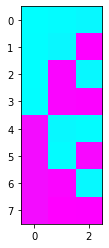

In [11]:
# visualize a heatmap of the weights
import matplotlib.pyplot as plt
import numpy as np

weights = model.get_weights()[0]

plt.imshow(weights, cmap='cool', interpolation='nearest')
plt.show()